<a href="https://colab.research.google.com/github/Monika1266/PRODIGY_ML_02/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Loading dataset

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


Data Analysis

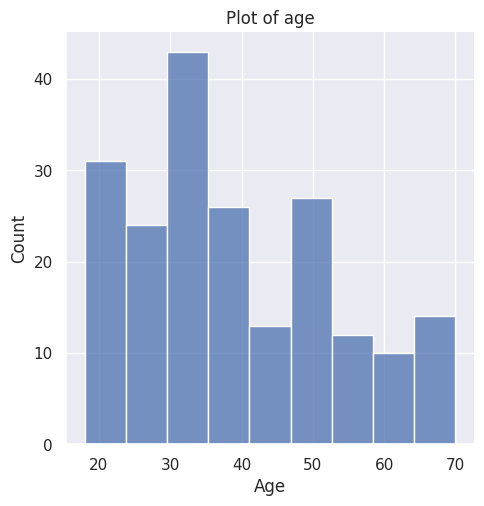

In [6]:
sns.set(style="darkgrid")
sns.displot(df["Age"])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Plot of age')
plt.show()

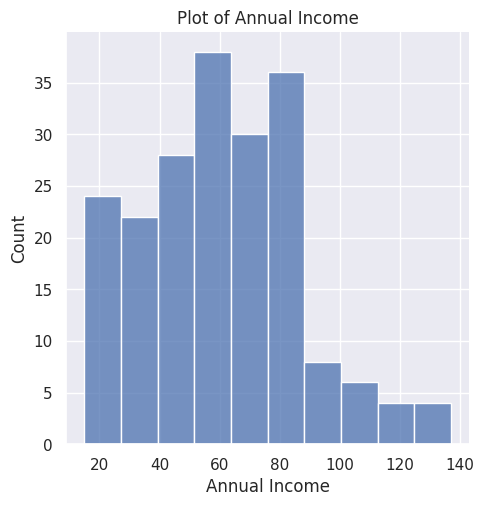

In [7]:
sns.set(style="darkgrid")
sns.displot(df["Annual Income (k$)"])
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Plot of Annual Income')
plt.show()

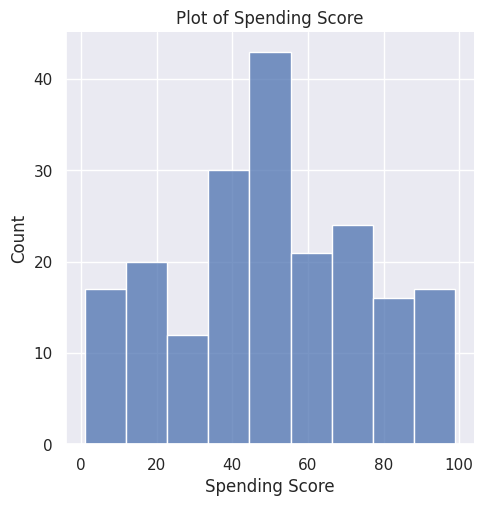

In [8]:
sns.set(style="darkgrid")
sns.displot(df["Spending Score (1-100)"])
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.title('Plot of Spending Score')
plt.show()

Visualizing data points

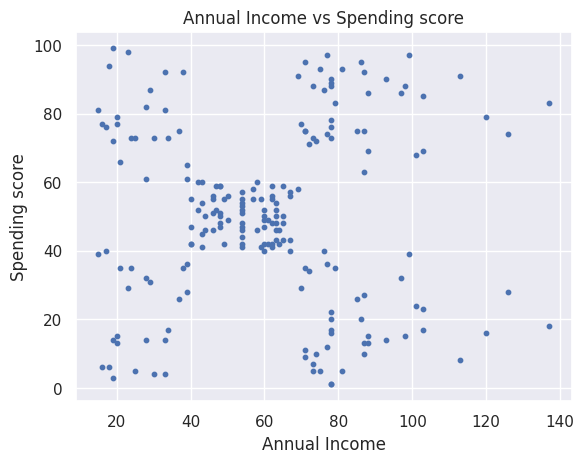

In [9]:
x=df.iloc[:,[3,4]].values
plt.scatter(x[:,0],x[:,1],s=10)
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.title("Annual Income vs Spending score")
plt.show()

Elbow curve

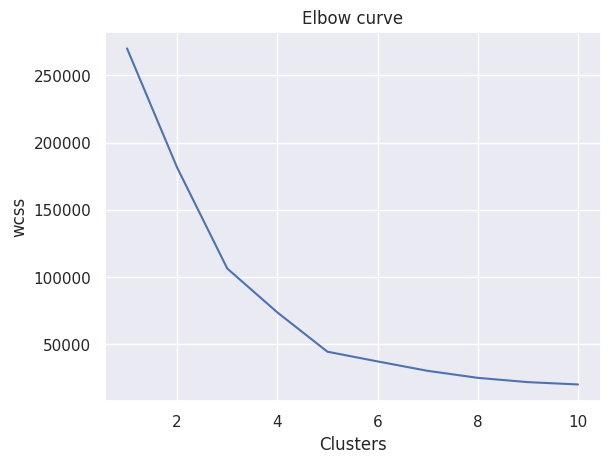

In [10]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, n_init=10)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel("Clusters")
plt.ylabel("wcss")
plt.title("Elbow curve")
plt.show()

Training dataset

In [11]:
kmean=KMeans(n_clusters=5, n_init=10)
kmean.fit(x)
y_pred=kmean.predict(x)

Visualization of K-means clusters

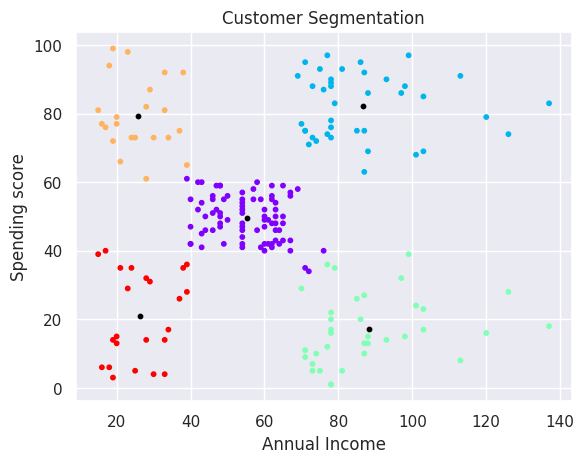

In [12]:
plt.scatter(x[:,0],x[:,1],c=kmean.labels_,cmap='rainbow',s=10)
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],color='black',s=10)
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.title('Customer Segmentation')
plt.show()